In [38]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

# Function that Saves Stock Data to CSV

In [31]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    df.to_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    return df

# Function that Returns a Dataframe from a CSV

In [32]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

# Add Daily Return to Dataframe

In [33]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("/home/serhiizem/Documents/Tutorials/Python For Finance/" + ticker + '.csv')
    
    return df

# Get Total Return Over Time

In [34]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)
    

# Matplotlib Finance

In [35]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv('/home/serhiizem/Documents/Tutorials/Python For Finance/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 12})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(24, 16), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

# Simple Price Plot

In [53]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv('/home/serhiizem/Documents/Tutorials/Python For Finance/' + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

Total return:  0.6166401575831238


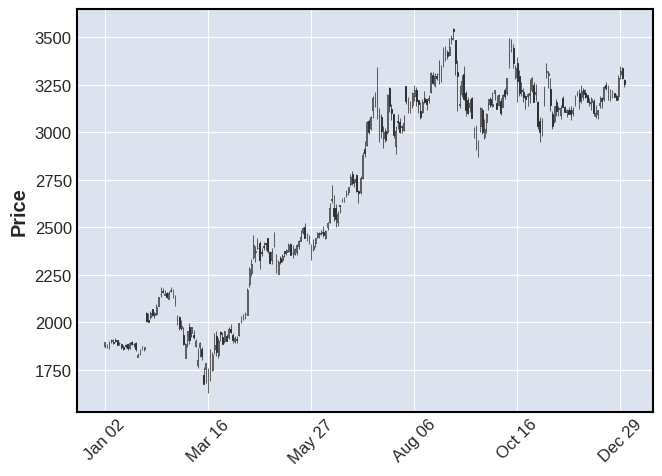

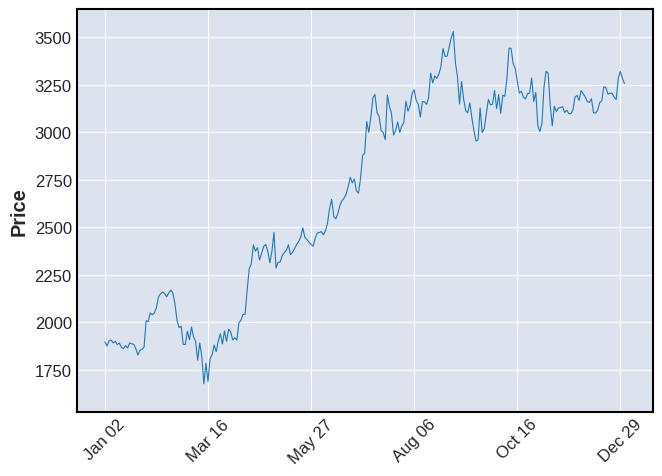

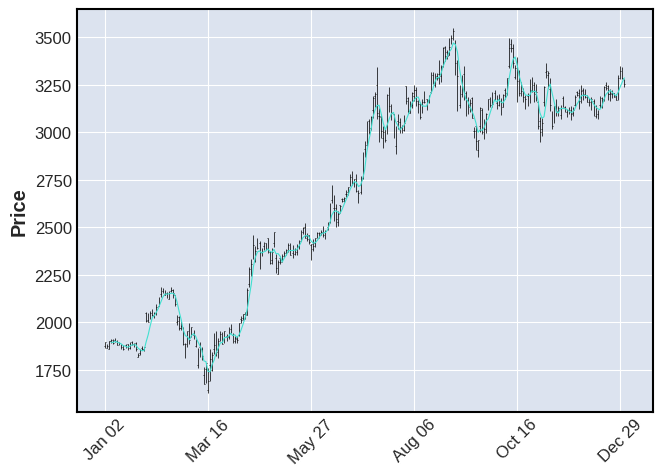

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,NaN
1,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
2,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
3,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
4,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,-0.007809
...,...,...,...,...,...,...,...,...
248,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,-0.003949
249,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,0.035071
250,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,0.011584
251,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,-0.010882


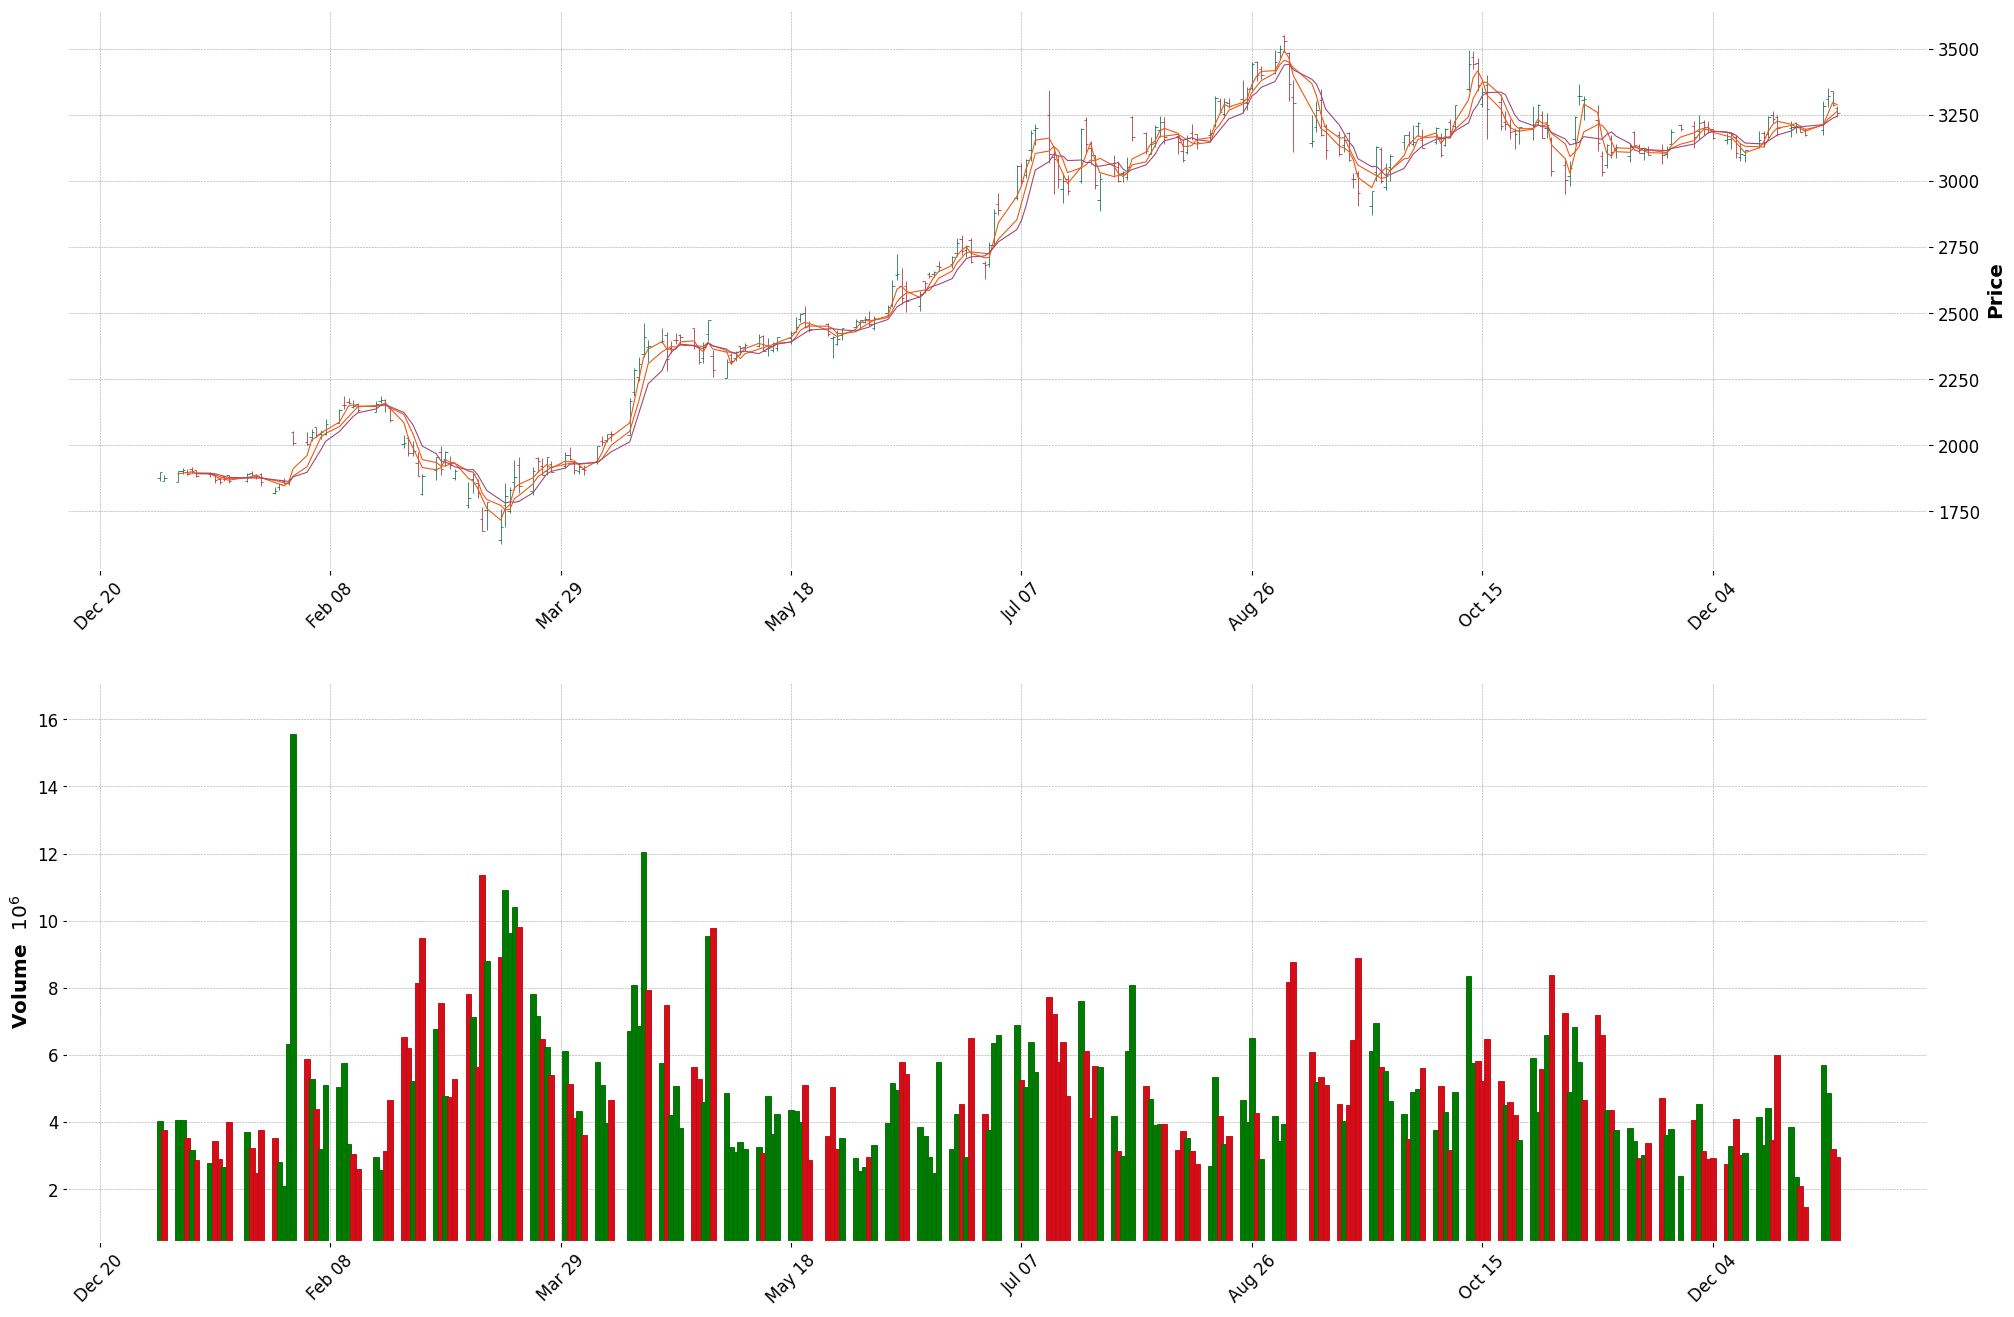

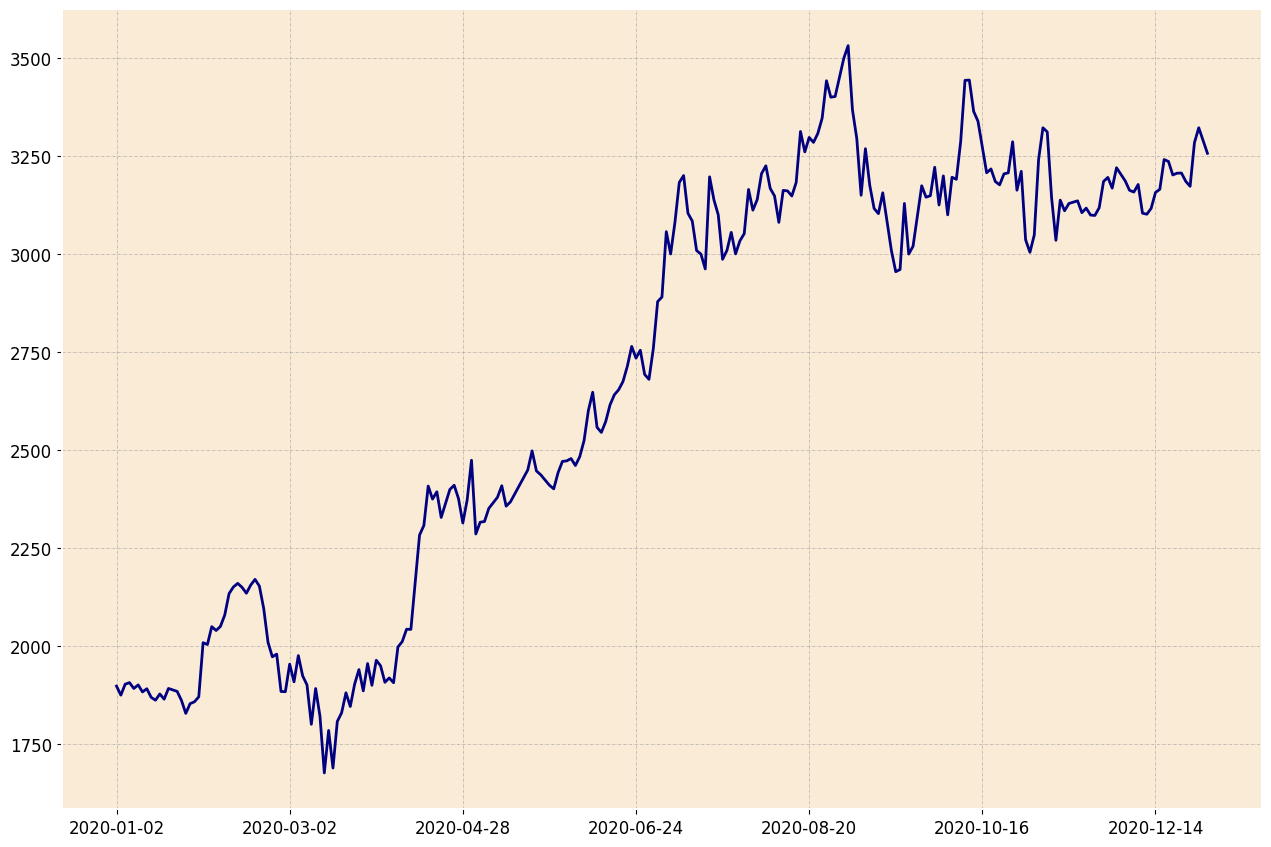

In [56]:
save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

AMZN = get_df_from_csv('AMZN')
add_daily_return_to_df(AMZN, 'AMZN')
total_return = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total return: ", total_return)

mplfinance_plot('AMZN', 'ohlc', 2020, 1, 1, 2021, 1, 1)
price_plot('AMZN', 2020, 1, 1, 2021, 1, 1)

AMZN